# DATA 601 MID-TERM PROJECT

DATA SOURCE:
Link: https://archive.ics.uci.edu/ml/datasets/Student+Performance+on+an+entrance+examination

This dataset contains the data of the candidates who qualified the medical entrance examination for admission to medical colleges of Assam of a particular year.

Documentary Data Analyzis:

Performance-Performance in Common Entrance Examination (CEE)

Gender-Sex of the Candidate

Caste-Caste of the Candidate

Coaching-Whether the candidate attended any coaching classes within Assam, outside Assam or not

Time-No of attempts taken

Class_ten_education-Name of the board where the candidate studied at Class X level

twelve_education-Name of the board where the candidate studied at Class XII level

Medium-Medium of instructions for the study at Class XII level

Class_ X_Percentage-The percentage secured by the candidate at Class X standard

Class_XII_Percentage-The percentage secured by the candidate at Class XII standard

Father_occupation-The occupation of the father of the candidate

Mother_occupation-The occupation of the mother of the candidate

DATA SIZE:

The dataset is of the size of 55KB

Dataset contains one table.

DataSet contains 666 rows 12 columns.

In [22]:

import pandas as pd
import os
from matplotlib import pyplot as plt
import seaborn as sns


In [23]:
df = pd.read_csv(r"C:\Users\Admin\OneDrive\Desktop\student_performance.csv")
df.shape

(666, 12)

In [24]:
df.head()

,Performance,Gender,Caste,coaching,time,Class_ten_education,twelve_education,medium,'Class_ X_Percentage',Class_XII_Percentage,Father_occupation,Mother_occupation
0,Excellent,male,General,NO,ONE,SEBA,AHSEC,ENGLISH,Excellent,Excellent,DOCTOR,OTHERS
1,Excellent,male,OBC,WA,TWO,SEBA,AHSEC,OTHERS,Excellent,Excellent,SCHOOL_TEACHER,HOUSE_WIFE
2,Excellent,male,OBC,OA,TWO,OTHERS,CBSE,ENGLISH,Excellent,Excellent,BUSINESS,HOUSE_WIFE
3,Excellent,male,General,WA,ONE,SEBA,AHSEC,OTHERS,Excellent,Excellent,SCHOOL_TEACHER,SCHOOL_TEACHER
4,Excellent,male,General,OA,TWO,SEBA,CBSE,ENGLISH,Excellent,Excellent,COLLEGE_TEACHER,HOUSE_WIFE


In [25]:
df = df.astype(str)
df.dtypes

Performance              object
Gender                   object
Caste                    object
coaching                 object
time                     object
Class_ten_education      object
twelve_education         object
medium                   object
'Class_ X_Percentage'    object
Class_XII_Percentage     object
Father_occupation        object
Mother_occupation        object
dtype: object

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Performance            666 non-null    object
 1   Gender                 666 non-null    object
 2   Caste                  666 non-null    object
 3   coaching               666 non-null    object
 4   time                   666 non-null    object
 5   Class_ten_education    666 non-null    object
 6   twelve_education       666 non-null    object
 7   medium                 666 non-null    object
 8   'Class_ X_Percentage'  666 non-null    object
 9   Class_XII_Percentage   666 non-null    object
 10  Father_occupation      666 non-null    object
 11  Mother_occupation      666 non-null    object
dtypes: object(12)
memory usage: 62.6+ KB



### DATA CLEANING


Removing unwanted quote in the data set

In [27]:
df.columns = df.columns.str.replace('\'', '')
df.columns = df.columns.str.replace(' ', '')

Removing shortcuts/abbrevations in the data set

In [28]:
df['Class_XII_Percentage'] = df['Class_XII_Percentage'].replace({'Vg':'Very Good'})
df['Class_X_Percentage'] = df['Class_X_Percentage'].replace({'Vg':'Very Good'})
df['Performance'] = df['Performance'].replace({'Vg':'Very Good'})
df['coaching'] = df['coaching'].replace({'WA':'Within Assam','OA':'Outside Assam','NO':'No Coaching'})

In [29]:
df.head()

,Performance,Gender,Caste,coaching,time,Class_ten_education,twelve_education,medium,Class_X_Percentage,Class_XII_Percentage,Father_occupation,Mother_occupation
0,Excellent,male,General,No Coaching,ONE,SEBA,AHSEC,ENGLISH,Excellent,Excellent,DOCTOR,OTHERS
1,Excellent,male,OBC,Within Assam,TWO,SEBA,AHSEC,OTHERS,Excellent,Excellent,SCHOOL_TEACHER,HOUSE_WIFE
2,Excellent,male,OBC,Outside Assam,TWO,OTHERS,CBSE,ENGLISH,Excellent,Excellent,BUSINESS,HOUSE_WIFE
3,Excellent,male,General,Within Assam,ONE,SEBA,AHSEC,OTHERS,Excellent,Excellent,SCHOOL_TEACHER,SCHOOL_TEACHER
4,Excellent,male,General,Outside Assam,TWO,SEBA,CBSE,ENGLISH,Excellent,Excellent,COLLEGE_TEACHER,HOUSE_WIFE


Checking whether the data set contains any null values or not


In [30]:
df.isnull().sum()

Performance             0
Gender                  0
Caste                   0
coaching                0
time                    0
Class_ten_education     0
twelve_education        0
medium                  0
Class_X_Percentage      0
Class_XII_Percentage    0
Father_occupation       0
Mother_occupation       0
dtype: int64

### EDA

The below bar graph shows the count of different level of performance of the students in the medical entrace exam

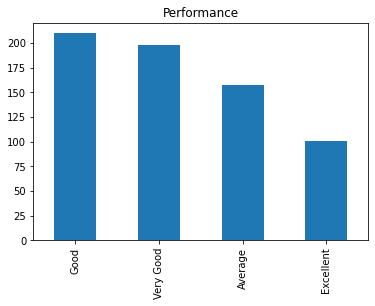

In [33]:
df.Performance.value_counts().plot.bar(title = 'Performance')
plt.show()

The below Pie chart shows the number of people participated in the medical entrace exam based on their genders

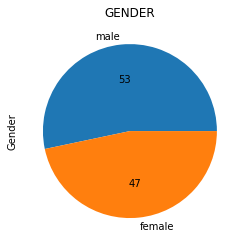

In [32]:
df.Gender.value_counts().plot.pie(autopct='%1.0f',title='GENDER')
plt.show()


The below bar plot shows the perfomance of people participated in the medical entrace exam based on their genders


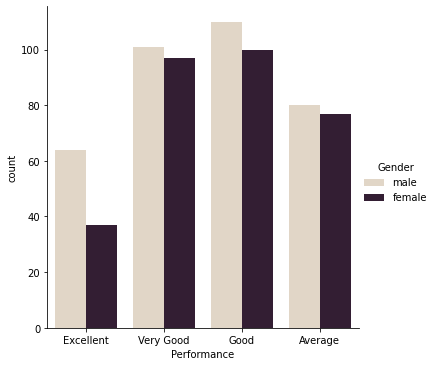

In [35]:
plot = sns.catplot(data= df, kind = 'count', x = 'Performance',hue='Gender',palette="ch:.25")

In [36]:
df1 = df.groupby(["Performance",'Father_occupation','Mother_occupation'], as_index=False).size()

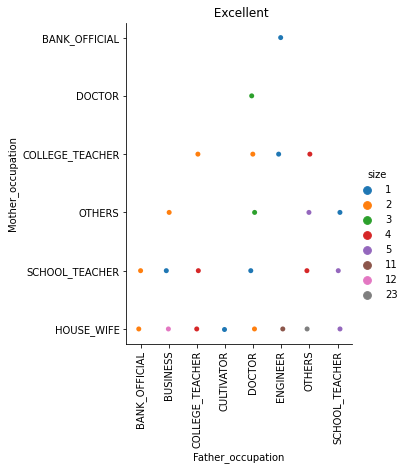

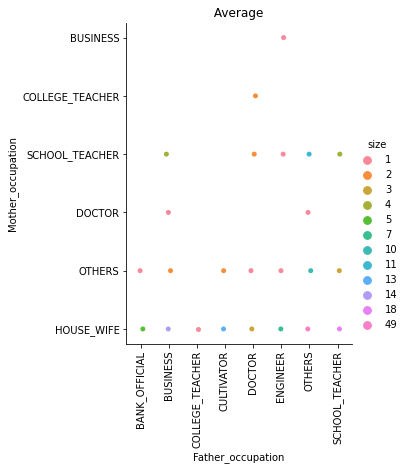

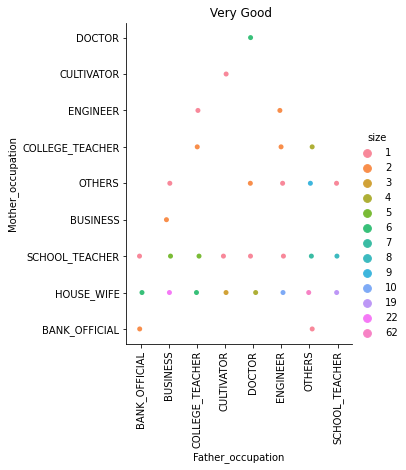

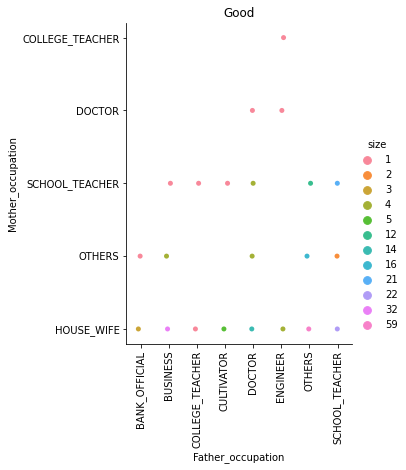

In [51]:
import warnings

df2 = df1.loc[df1['Performance'] == "Excellent"]
df3 = df1.loc[df1['Performance'] == "Average"]
df4 = df1.loc[df1['Performance'] == "Very Good"]
df5 = df1.loc[df1['Performance'] == "Good"]

# fig, axes = plt.subplots(1, 2)


#plot 1:
warnings.filterwarnings("ignore")
sns.catplot(ax=axes[0],data=df2, x='Father_occupation',y = 'Mother_occupation', hue = 'size').set(title = " Excellent")
plt.xticks(rotation=90)


#plot 2:
warnings.filterwarnings("ignore")
sns.catplot(ax=axes[1],data=df3, x='Father_occupation',y = 'Mother_occupation', hue = 'size').set(title = " Average ")
plt.xticks(rotation=90)


#plot 3:
warnings.filterwarnings("ignore")
sns.catplot(ax=axes[0],data=df4, x='Father_occupation',y = 'Mother_occupation', hue = 'size').set(title = " Very Good")
plt.xticks(rotation=90)



#plot 4:
warnings.filterwarnings("ignore")
sns.catplot(ax=axes[1],data=df5, x='Father_occupation',y = 'Mother_occupation', hue = 'size').set(title = "Good")
plt.xticks(rotation=90)



plt.show()



The above graphs shows parental occupational parameters that factored in the success of the students in medical entrance exam at various levels.

Converting the time(no of attempts taken) value from object to integer for better analysis

In [52]:
cleanup_nums = {"time":     {"ONE": 1, "TWO": 2, "THREE": 3, "FOUR": 4, "FIVE": 5, "SEVEN": 7}}
con_df = df.replace(cleanup_nums)
con_df.dtypes

Performance             object
Gender                  object
Caste                   object
coaching                object
time                     int64
Class_ten_education     object
twelve_education        object
medium                  object
Class_X_Percentage      object
Class_XII_Percentage    object
Father_occupation       object
Mother_occupation       object
dtype: object

Violin plot to see the distribution and median of no of attempts taken by students with different medium of instructions at XII level

<AxesSubplot:xlabel='medium', ylabel='time'>

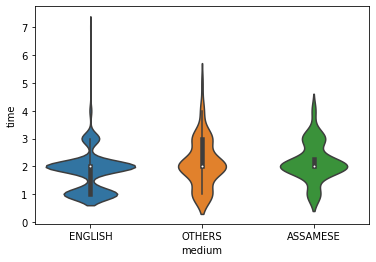

In [53]:
sns.violinplot(x=con_df.medium, y=con_df.time)

Types of coaching taken by students

Text(0.5, 1.0, 'Types of Coachings taken\n')

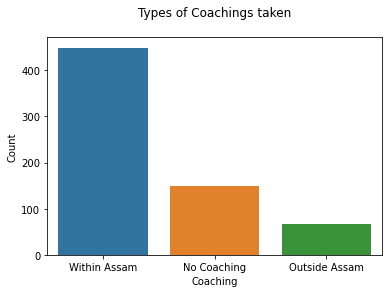

In [54]:
Attempts_df = df.coaching.value_counts().reset_index(name='Count').sort_values( ['Count'], ascending=False)
Attempts_df.rename({'index': 'Coaching'}, axis=1, inplace=True)
ax=sns.barplot(data=Attempts_df, x='Coaching', y='Count')
ax.set_title("Types of Coachings taken\n")

Types of coaching taken by excellent students

Text(0.5, 1.0, 'excellent students Coaching types\n')

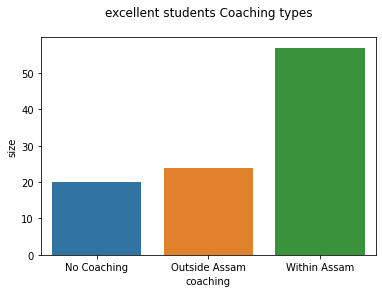

In [55]:
d = df.loc[df['Performance'] == "Excellent"]
data1 = d.groupby(['coaching'], as_index=False).size()
data1
ax=sns.barplot(data=data1, x='coaching', y='size')
ax.set_title("excellent students Coaching types\n")


### Conclusion

To conclude, the dataset is cleansed and different types of visualisations are observed. Through EDA process, we have observed that there are more students whose performance is 'Good' in the examinations. Using scatterplot, we observed the visualisation of performance based on the occupation of student's mother and father.Students whose performance was 'Excellence' were trained within Assam.